In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bins_5 = [18]+list(np.arange(25,90,5))+[1000] # bin edges for mostly 5-year intervals


In [2]:
# load NN predictions
results_nn_dict = pickle.load(open('./neural_net/predictions_age.pkl', 'rb'))
results_nn_95 = np.array([np.array(results_nn_dict[i]) for i in sorted(results_nn_dict.keys())])

results_nn_dict = pickle.load(open('./neural_net/predictions_age_99p.pkl', 'rb'))
results_nn_99 = np.array([np.array(results_nn_dict[i]) for i in sorted(results_nn_dict.keys())])
results_nn_99.shape



(14, 3)

In [3]:
# load refineR predictions
rr_files = sorted(['./refineR/'+i for i in os.listdir('./refineR/') if i.startswith('data_') and 'no_outlier' in i and '99p' not in i])
results_rr = []
for i in rr_files:
    results_rr.append(pd.read_csv(i).iloc[1,1:].values)
results_rr = np.array(results_rr)
results_rr.shape
results_rr_95 = results_rr

rr_files = sorted(['./refineR/'+i for i in os.listdir('./refineR/') if i.startswith('data_') and 'no_outlier' in i and '99p' in i])
results_rr = []
for i in rr_files:
    results_rr.append(pd.read_csv(i).iloc[1,1:].values)
results_rr = np.array(results_rr)
results_rr_99 = results_rr
results_rr.shape
del results_rr


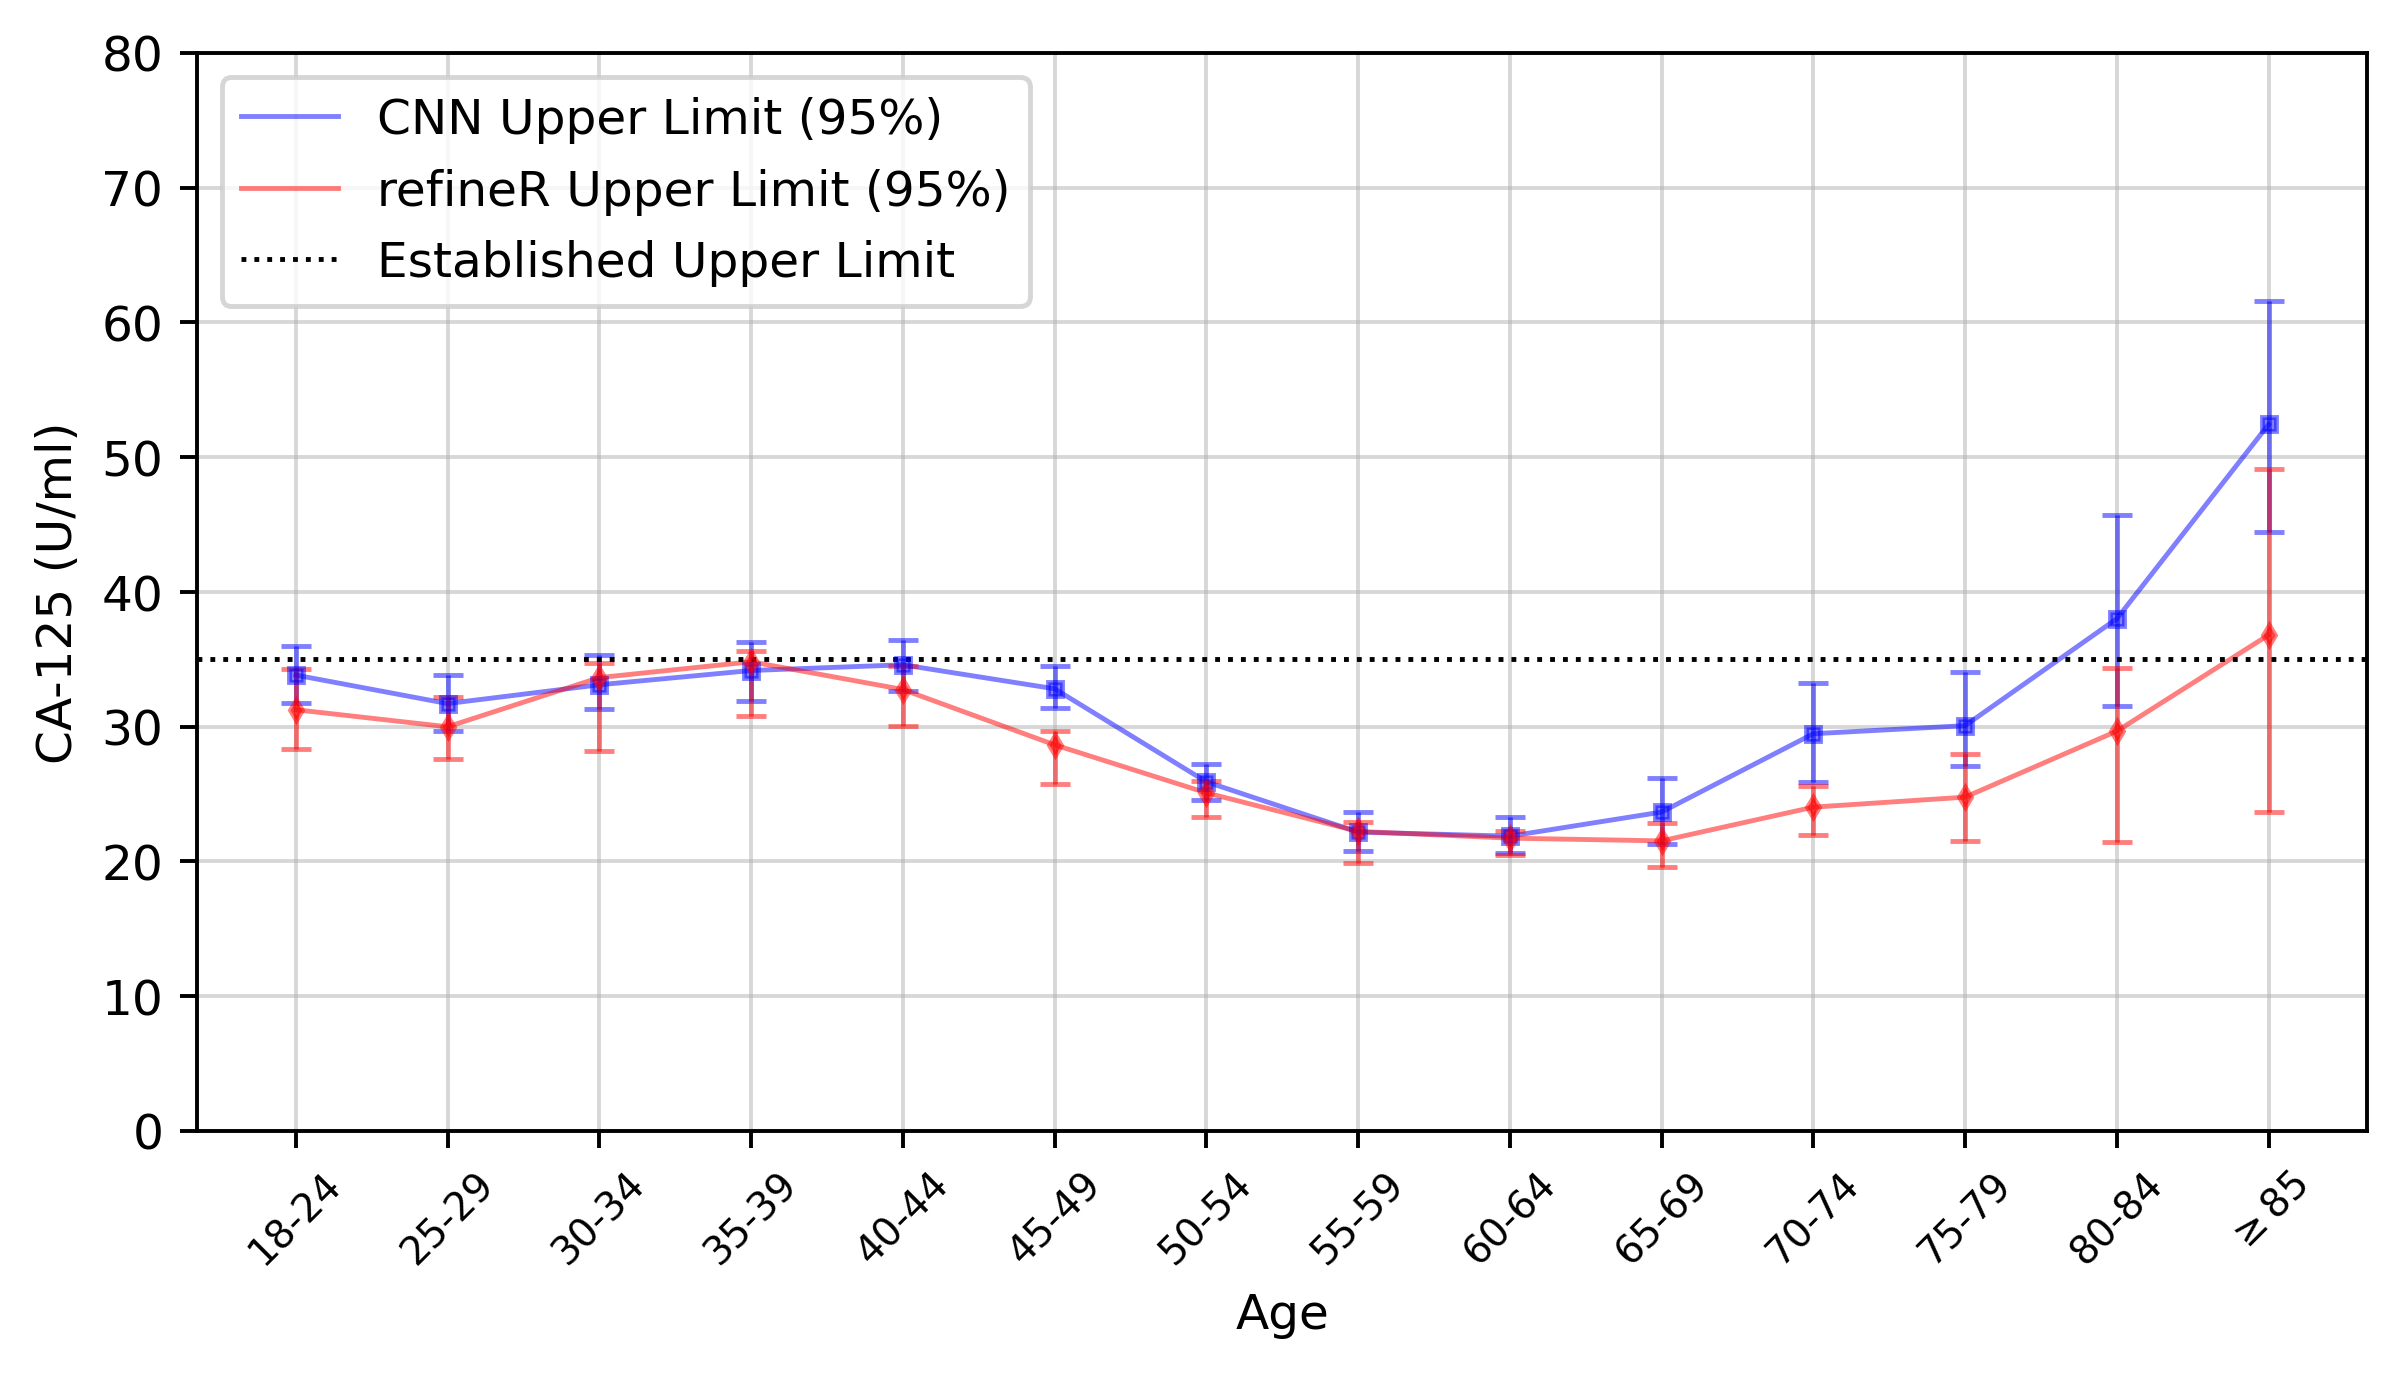

In [7]:
plt.figure(figsize=(8, 4), dpi=350)

# plot 95 percentiles

# plot NN results
# plt.subplot(1,2,1)
plt.plot(
    np.arange(results_nn_95.shape[0]), 
    [i[0] for i in results_nn_95],
    c='b', linewidth=1, label='CNN Upper Limit (95%)', alpha=0.5
);
plt.errorbar(
    np.arange(results_nn_95.shape[0]), 
    [i[0] for i in results_nn_95], # average prediction
    yerr=[
        [i[0]-i[1] for i in results_nn_95],
        [i[2]-i[0] for i in results_nn_95],
    ],
    c='b', markersize=3, alpha=0.5,
    fmt='s', capsize=3, capthick=1, ecolor='b', linewidth=1
);


# plot refineR results
plt.plot(
    np.arange(results_nn_95.shape[0]),     
    [i[0] for i in results_rr_95],
    c='r', linewidth=1, label='refineR Upper Limit (95%)', alpha=0.5
);
plt.errorbar(
    np.arange(results_nn_95.shape[0]),     
    [i[0] for i in results_rr_95], # average prediction
    yerr=[
        np.maximum(0, [i[0]-i[1] for i in results_rr_95]),
        np.maximum(0, [i[2]-i[0] for i in results_rr_95]),
    ],
    c='r', markersize=3, alpha=0.5,
    fmt='d', capsize=3, capthick=1, ecolor='r', linewidth=1
);

plt.xticks(np.arange(results_nn_95.shape[0]))
plt.gca().set_xticklabels([str(bins_5[i])+'-'+str(bins_5[i+1]-1) if bins_5[i]<85 else r'$\geq85$' for i in range(len(bins_5)-1)], rotation=45, fontsize=8)
plt.ylim([0, 80])
plt.grid(alpha=0.5);
plt.xlabel('Age');
plt.ylabel('CA-125 (U/ml)')
plt.axhline(35, label='Established Upper Limit', linewidth=1, c='k', linestyle=':')
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left');






# # plot 99 percentiles

# # plot NN results
# plt.subplot(1,2,2)
# plt.plot(
#     np.arange(results_nn_99.shape[0]), 
#     [i[0] for i in results_nn_99],
#     c='b', linewidth=1, label='CNN Upper Limit (99%)', alpha=0.5
# );
# plt.errorbar(
#     np.arange(results_nn_99.shape[0]), 
#     [i[0] for i in results_nn_99], # average prediction
#     yerr=[
#         [i[0]-i[1] for i in results_nn_99],
#         [i[2]-i[0] for i in results_nn_99],
#     ],
#     c='b', markersize=3, alpha=0.5,
#     fmt='s', capsize=3, capthick=1, ecolor='b', linewidth=1
# );


# # plot refineR results
# plt.plot(
#     np.arange(results_nn_99.shape[0]),     
#     [i[0] for i in results_rr_99],
#     c='r', linewidth=1, label='refineR Upper Limit (99%)', alpha=0.5
# );
# plt.errorbar(
#     np.arange(results_nn_99.shape[0]),     
#     [i[0] for i in results_rr_99], # average prediction
#     yerr=[
#         np.maximum(0, [i[0]-i[1] for i in results_rr_99]),
#         np.maximum(0, [i[2]-i[0] for i in results_rr_99]),
#     ],
#     c='r', markersize=3, alpha=0.5,
#     fmt='d', capsize=3, capthick=1, ecolor='r', linewidth=1
# );


# plt.xticks(np.arange(results_nn_99.shape[0]))
# plt.gca().set_xticklabels([str(bins_5[i])+'-'+str(bins_5[i+1]-1) if bins_5[i]<85 else r'$\geq85$' for i in range(len(bins_5)-1)], rotation=45, fontsize=8)
# plt.ylim([0, 80])
# plt.grid(alpha=0.5);
# plt.xlabel('Age');
# plt.axhline(35, label='Established Upper Limit', linewidth=1, c='k', linestyle=':')
# handles, labels = plt.gca().get_legend_handles_labels()
# order = [0,1,2]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left');

# plt.tight_layout()

